In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

In [31]:
adv=pd.read_csv('Advertising.csv')

In [32]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
adv.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

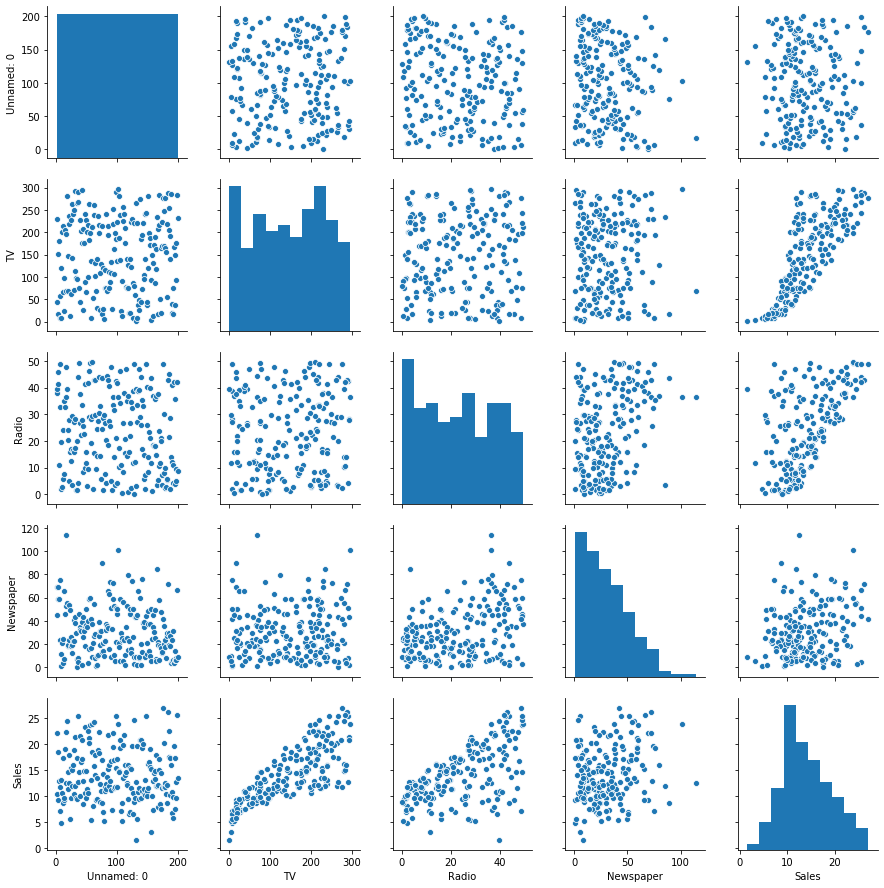

In [34]:
sns.pairplot(adv)

ASSUMPTIONS CHECK

1. LINEARITY --> linear rel between independent and dep var

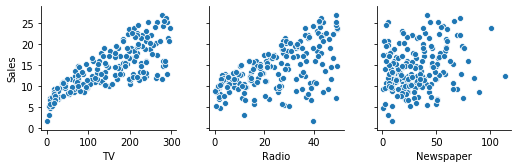

In [35]:
##check between all indep vs dep var

sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

2. MEAN OF RESIDUALS --> mean of residuals must be close/equal to zero

In [36]:
x = adv.drop(["Sales"],axis=1)
y = adv.Sales

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [47]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))


R squared: 0.9077957412584542


In [48]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
## here mean of res is almost close to zero

Mean of Residuals -2.350712217472998e-15


3. HOMOSCEDASTICITY --> the variance of residuals should be almost equal, chcked by plotting error terms with predictions
   Absence of HOMOSCEDASTICITY --> heteroscadesticity --> plot error terms with predictions , if scatter plot is linear/quadratic/funnel shaped.
    
    Checking for heteroscadesticity --> GoldFeldQuandt, Baeush-Pagan test

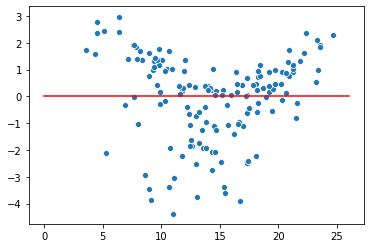

In [64]:
sns.scatterplot(y_pred,residuals)
sns.lineplot([0,26],[0,0],color='red')
##presence of heteroscadesticity

In [50]:
##GoldFeldQuandt test

## null hypo -- error terms are homo
## alt hypo -- error terms are hetero
## if p value > 0.05 accept null hypo
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

## here as p value > 0.05 accept null hypo

[('F statistic', 1.105896464083755), ('p-value', 0.33633256748859414)]

In [70]:
## bauesh pagan tst
test = sms.het_breuschpagan(residuals, X_train)
print('lm p-value',test[1],'\n')
print('f p-value',test[3])

lm p-value 0.25049091230422615 

f p-value 0.3956300216440555


4. Check for Normality of error terms/residuals

In [61]:
adv.drop('Unnamed: 0',axis=1,inplace=True)


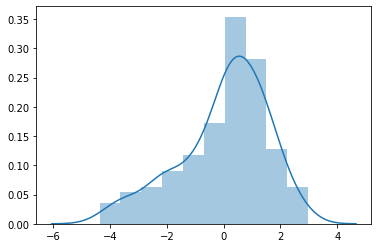

In [62]:
p = sns.distplot(residuals,kde=True)


5. No AutoCorrelation between residuals --> When the residuals are autocorrelated, it means that the current value is dependent of the previous value

6. No Perfect multicollinearity
Multicollinearity affects --> p-values and coefficients
Multicollinearity doesn't affects --> predictions, goodness of fit
If we just have to predict, no need to check for multicollinearity
If we have to check how every independent var influences the prediction, then check for multicollinearity

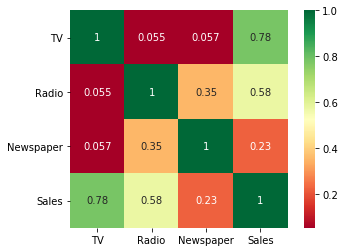

In [63]:
p=sns.heatmap(adv.corr(), annot=True,cmap='RdYlGn',square=True) 